

# Project: Investigate a Dataset (No_Show Apointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>__No_Show_Apointments dataset__ : This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

___the properties of the dataset :___
<ul>
<li>PatientId: Identification of a patient.</li>
<li>AppointmentID : Identification of each appointment.</li>
<li>Gender : Male or Female.</li>
<li>ScheduledDay : tells us on what day the patient set up their appointment.</li>
<li>AppointmentDay : The day of the actuall appointment, when they have to visit the doctor</li>
<li>Age : How old is the patient.</li>
<li>Neighbourhood : indicates the location of the hospital.</li>
<li>Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program(True or False).</li> 
<li>Hipertension : True or False</li>
<li>Diabetes : True or False</li>
<li>Alcoholism : True or False</li>
<li>Handcap : values from 0 to 4 . where 0 means "not a handicap" , and the other values refer to the degree of Handicap</li>
<li>SMS_recieved : indicates whether or not the patient has received a reminder text message.</li>
<li>No_Show :  says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

## My questions on the dataset : 
what gender does actually show up more for the appointments ?

do patients with scholarchips show up more ?

does the Age affect the patient to show up or not ?

does the patient who has (Hypertension or Diabetes or Alcoholism or Handicap) has a higher rate of showing or less ?


In [1]:
# importing the packages that i'm going to use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# 'magic word' so that the visualizations are plotted inline with the notebook
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#loading the dataset
df = pd.read_csv('no_show_appointments.csv')

# this returns the first few rows of the dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


we can see that the header of the dataset has some misspelled words, and also i don't think that the word "Neighbourhood" represents clearly "the location of the hospital" , and i'll change "No-show" to "No_show".

_so, i'll change some of the column names._

__checking for incorrect datatypes__

In [3]:
#this returns the datatypes of all the columns
#checking for incorrect datatypes

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

_all datatypes look good , only the dates which are considered as strings in python because it stores a pointer to the date and not the date itself, so we'll change the datatype of both "ScheduledDay" and "AppointmentDay" in case we need to work with them ._

_and also the PatientId has a type float which is unusual, so i'll change it to int_

__checking for missing data__

In [4]:
#this displays some info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


_we can see that the dataset has 110527 and 14 columns , and there are no missing (null) data ._

__checking for duplicates__

In [5]:
#cheecking for any duplicated rows and appointments.
print('duplicated rows : {}'.format(df.duplicated().sum()))
print('duplicated appointments : {}'.format(df['AppointmentID'].duplicated().sum()))

duplicated rows : 0
duplicated appointments : 0


__some extra wrangling__

In [6]:
#this returns the unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#this displays the unique values in the Age column sorted from the smallest to the biggest
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

_we can see that there is an impossiple age number wich is -1. so, i'll drop the rows that have an age of -1 to have a more "correct" dataset_

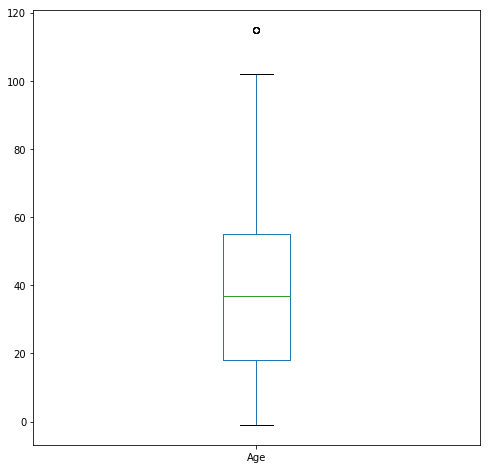

In [8]:
#drawing a box plot of the ages to look for outliers
df['Age'].plot(kind='box',figsize=(8,8))

_we can also see that there is an outlier in the box plot which is the age 115. so, i'll drop the row that has an age of 115 too_

In [9]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

_here we see that the 'Handcap' column has 5 values .<br>
i'm thinking that 0 means "not a handicap" , and the other values refer to the degree of Handicap_

## Data Cleaning
__rename columns__

In [10]:
#changing some of the column names using the rename() function
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap','Neighbourhood':'Hospital_location','No-show':'No_show'},inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Hospital_location', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_show'],
      dtype='object')

__change PatientId datatype to int__

In [11]:
#changing the "PatientId" datatype to integer using the astype() function
df['PatientId'] = df['PatientId'].astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__change the datatype of dates "ScheduledDay" and "AppointmentDay" to dates instead of strings__

In [12]:
#changing string to date using the to_datetime() function in pandas
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#checking for datatypes
df.dtypes

PatientId                     int64
AppointmentID                 int64
Gender                       object
ScheduledDay         datetime64[ns]
AppointmentDay       datetime64[ns]
Age                           int64
Hospital_location            object
Scholarship                   int64
Hypertension                  int64
Diabetes                      int64
Alcoholism                    int64
Handicap                      int64
SMS_received                  int64
No_show                      object
dtype: object

_after changing the datatype of both "ScheduledDay" and "AppointmentDay", i'll check if there are any errant values._

_i'll add another column that calculates the difference between the two dates._

In [13]:
#importing the datetime package so that i can work with dates and timedelta
import datetime

#adding a rows that contains the difference between the appointment day and the scheduled day
#i'm adding 1 day to the difference because the appointment date starts from midnight
df['date_diff'] = df['AppointmentDay']-df['ScheduledDay']+datetime.timedelta(days=1)

#displaying the appointment where the scheduled day is after the appointment day !!!
df.loc[df['date_diff'] < datetime.timedelta(days=0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,date_diff
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days +13:08:07
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days +09:09:19
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days +10:16:02
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days +10:10:40
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days +17:09:03


_as we can see in the table above there are some rows where the Appointment day preceeds the scheduled day which is impossible._

_so, i'll drop those rows too. because they have wrong information._

In [14]:
#droping rows using the indices in the table above
df.drop([27033,55226,64175,71533,72362],inplace=True)

#checking again
df.loc[df['date_diff'] < datetime.timedelta(days=0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,date_diff


_Now i'll drop the date_diff column because i don't need it anymore_

In [15]:
#droping the extra column that i added earlier (date_diff)
df.drop(['date_diff'],axis=1,inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Hospital_location', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_show'],
      dtype='object')

__Drop rows where Age is less than 0 or more than 102__

In [16]:
#Droping rows where Age is less than 0
df.drop(df[df.Age<0].index,inplace=True)
df.drop(df[df.Age>102].index,inplace=True)

In [17]:
#checking for the Age values again
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 0 to 110526
Data columns (total 14 columns):
PatientId            110516 non-null int64
AppointmentID        110516 non-null int64
Gender               110516 non-null object
ScheduledDay         110516 non-null datetime64[ns]
AppointmentDay       110516 non-null datetime64[ns]
Age                  110516 non-null int64
Hospital_location    110516 non-null object
Scholarship          110516 non-null int64
Hypertension         110516 non-null int64
Diabetes             110516 non-null int64
Alcoholism           110516 non-null int64
Handicap             110516 non-null int64
SMS_received         110516 non-null int64
No_show              110516 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (_what gender does actually show up more for the appointments ?_)

In [19]:
#the counts of gender in the dataset
print(df['Gender'].value_counts())

F    71831
M    38685
Name: Gender, dtype: int64


_we can see that the number of Females is relatively higher than males._

_so, i'm going to calculate the proportion of showing up for each gender seperately._

In [20]:
#calculating the proportion of showing up for females by counting how many females (show up/don't show up) to the 
#appointment devided by the whole number of females in the dataset 

(df['No_show'].groupby(df.Gender == 'F').value_counts()/71831)[1] 

No_show
No     0.796912
Yes    0.203088
Name: No_show, dtype: float64

In [21]:
#calculating the proportion of showing up for males by counting how many males (show up/don't show up) to the 
#appointment devided by the whole number of males in the dataset 

(df['No_show'].groupby(df.Gender == 'M').value_counts()/38685)[1] 

No_show
No     0.800362
Yes    0.199638
Name: No_show, dtype: float64

_clearly, both females and males have almost the same rate of showing up according to their numbers in the dataset_

_although, if we calculated the rate of showing up for genders according to the whole number of patients we'd have found that females have a much higher proportion of showing up, because they are almost the double of males in the dataset_

### Research Question 2  (_do patients with Scholarships show up more ?_)

In [22]:
#how many people have scholarships and how many don't
print('patients with scholarship : {} (about 10% of the whole dataset)'.format(df['Scholarship'].value_counts()[1]))
print('patients without scholarship : {} (about 90% of the whole dataset)'.format(df['Scholarship'].value_counts()[0]))

patients with scholarship : 10861 (about 10% of the whole dataset)
patients without scholarship : 99655 (about 90% of the whole dataset)


In [23]:
#calculating the proportion of showing up for patients without scholarships by counting how many patients without scholarships
#(show up/don't show up) to the appointment, devided by the whole number of patients without scholarships in the dataset 


(df['No_show'].groupby(df.Scholarship == 0).value_counts()/10861)[0]

No_show
No     0.762637
Yes    0.237363
Name: No_show, dtype: float64

In [24]:
#calculating the proportion of showing up for patients with scholarships by counting how many patients with scholarships
#(show up/don't show up) to the appointment, devided by the whole number of patients with scholarships in the dataset 

(df['No_show'].groupby(df.Scholarship == 1).value_counts()/99655 )[0]

No_show
No     0.801987
Yes    0.198013
Name: No_show, dtype: float64

_we can see that there is not a big difference in showing up to the appointment between people who have scholarships and people who don't_

### Research Question 3  (_does the Age affect the patient to show up or not ?_)


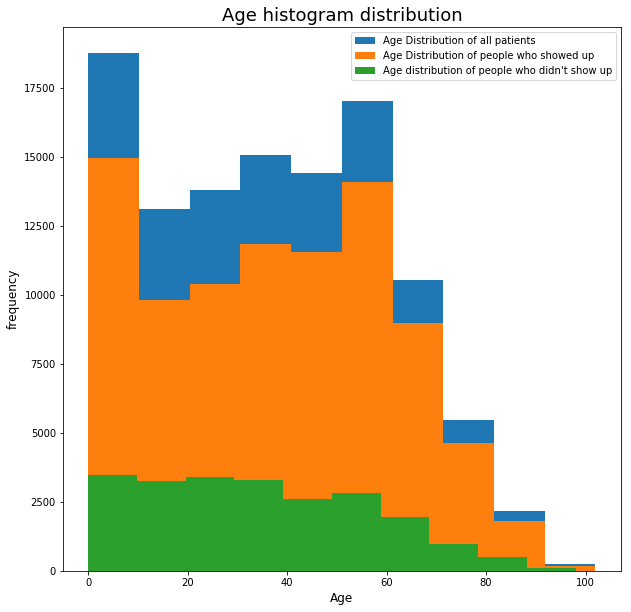

In [25]:
#Age histogram distribution

df['Age'].plot(kind='hist',label='Age Distribution of all patients',figsize=(10,10));
df.query('No_show == "No"')['Age'].plot(kind='hist',label='Age Distribution of people who showed up',figsize=(10,10));
df.query('No_show == "Yes"')['Age'].plot(kind='hist',label='Age distribution of people who didn\'t show up',figsize=(10,10));
plt.legend();
plt.title('Age histogram distribution',fontsize=18);
plt.xlabel('Age',fontsize=12);
plt.ylabel('frequency',fontsize=12);

_we can see from the histogram distribution of the Ages of patients that almost all three distributions are right skewed, which means that the age affects the patient to show up or not _

### Research Question 4  (_does the patient who has (Hypertension or Diabetes or Alcoholism or Handicap) has a higher rate of showing or less ?_)


In [26]:
#calculating the number of patients who have (Hypertension or Diabetes or Alcoholism or Handicap) and either showed up or not
df.query('Hypertension > 0 or Alcoholism > 0 or Handicap > 0 or Diabetes > 0')['No_show'].value_counts()

No     21694
Yes     4711
Name: No_show, dtype: int64

In [27]:
#calculating the number of patients who don't have (Hypertension or Diabetes or Alcoholism or Handicap) and either 
#showed up or not
df.query('Hypertension == 0 and Alcoholism == 0 and Handicap == 0 and Diabetes == 0')['No_show'].value_counts()

No     66511
Yes    17600
Name: No_show, dtype: int64

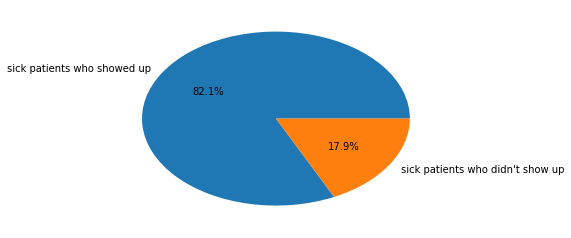

In [28]:
#drawing pie plot of the percentage of patients who have (Hypertension or Diabetes or Alcoholism or Handicap) and show/don't
#show up to appointments
plt.pie([21696,4716], labels=['sick patients who showed up','sick patients who didn\'t show up'], autopct='%1.1f%%');

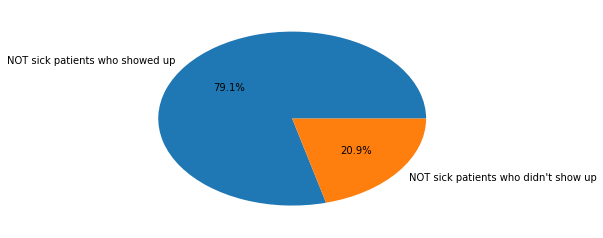

In [29]:
#drawing pie plot of the percentage of patients who don't have (Hypertension or Diabetes or Alcoholism or Handicap) and show/don't
#show up to appointments

plt.pie([66512,17603], labels=['NOT sick patients who showed up','NOT sick patients who didn\'t show up'], autopct='%1.1f%%');

<a id='conclusions'></a>
## Conclusions

> After cleaning the dataset and exploring some of it's properties , i did not see a characteristic that clearly affects the patient to show up to the appointment or not . only the age a little bit .<br>
this data set has more properties to be explored and analyzed , i just did a few of them
but i think that these properties will not help us decide what factors are important to know if a patient will show up for their scheduled appointment! we need more and better characteristics .


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0